# FRED

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime, timedelta

import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred

from dev.charts import plot_linechart, get_cutoff

sns.set()

In [3]:
def load_recession() -> pd.DataFrame:
    """
    NBER based Recession Indicators for the United States from the Period
    following the Peak through the Trough (USREC)
    """
    df = fred.get_series("USREC").to_frame("val")
    df["diff"] = df["val"].diff()
    return df


API_KEY = "<API_KEY>"
fred = Fred(api_key=API_KEY)

### Getting started

In [41]:
fred.search("potential gdp")

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
GDPPOT,GDPPOT,2021-04-29,2021-04-29,Real Potential Gross Domestic Product,1949-01-01,2031-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Not Seasonally Adjusted,NSA,2021-02-01 14:37:02-06:00,80,Real potential GDP is the CBO’s estimate of th...
NGDPPOT,NGDPPOT,2021-04-29,2021-04-29,Nominal Potential Gross Domestic Product,1949-01-01,2031-10-01,Quarterly,Q,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2021-02-01 14:37:08-06:00,63,None
GDPC1CTMLR,GDPC1CTMLR,2021-04-29,2021-04-29,Longer Run FOMC Summary of Economic Projection...,2009-02-18,2021-03-17,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-03-17 15:57:11-05:00,33,The longer-run projections are the rates of gr...
NROU,NROU,2021-04-29,2021-04-29,Natural Rate of Unemployment (Long-Term),1949-01-01,2031-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2021-02-01 14:37:05-06:00,77,The natural rate of unemployment (NAIRU) is th...
GDPC1MDLR,GDPC1MDLR,2021-04-29,2021-04-29,Longer Run FOMC Summary of Economic Projection...,2015-06-17,2021-03-17,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-03-17 15:57:20-05:00,28,The longer-run projections are the rates of gr...
GDPC1RHLR,GDPC1RHLR,2021-04-29,2021-04-29,Longer Run FOMC Summary of Economic Projection...,2009-02-18,2021-03-17,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-03-17 15:57:35-05:00,15,The longer-run projections are the rates of gr...
NROUST,NROUST,2021-04-29,2021-04-29,Natural Rate of Unemployment (Short-Term),1949-01-01,2031-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2021-02-01 14:37:07-06:00,61,The natural rate of unemployment (NAIRU) is th...
GDPC1RMLR,GDPC1RMLR,2021-04-29,2021-04-29,Longer Run FOMC Summary of Economic Projection...,2009-02-18,2021-03-17,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-03-17 15:57:28-05:00,6,The longer-run projections are the rates of gr...
GDPC1RLLR,GDPC1RLLR,2021-04-29,2021-04-29,Longer Run FOMC Summary of Economic Projection...,2009-02-18,2021-03-17,Not Applicable,NA,Fourth Quarter to Fourth Quarter Percent Change,Fourth Qtr. to Fourth Qtr. % Chg.,Not Seasonally Adjusted,NSA,2021-03-17 15:57:56-05:00,2,The longer-run projections are the rates of gr...


In [4]:
data = fred.get_series("SP500")
data.tail()

2021-04-22    4134.98
2021-04-23    4180.17
2021-04-26    4187.62
2021-04-27    4186.72
2021-04-28    4183.18
dtype: float64

In [5]:
data = fred.get_series_first_release("GDP")
data.tail()

date
2019-10-01    21734.266
2020-01-01     21537.94
2020-04-01    19408.759
2020-07-01    21157.635
2020-10-01    21479.529
Name: value, dtype: object

In [6]:
data = fred.get_series_as_of_date("GDP", "6/1/2014")
data.tail()

,realtime_start,date,value
2778,2014-01-30,2013-10-01,17102.5
2779,2014-02-28,2013-10-01,17080.7
2780,2014-03-27,2013-10-01,17089.6
2786,2014-04-30,2014-01-01,17149.6
2787,2014-05-29,2014-01-01,17101.3


In [12]:
df = fred.search_by_category(101, limit=10, order_by="popularity", sort_order="desc")
df["title"]

series id
SLOAS               Student Loans Owned and Securitized, Outstanding
TOTALSL            Total Consumer Credit Owned and Securitized, O...
TERMCBAUTO48NS     Finance Rate on Consumer Installment Loans at ...
TERMCBCCALLNS      Commercial Bank Interest Rate on Credit Card P...
REVOLSL            Total Revolving Credit Owned and Securitized, ...
MVLOAS             Motor Vehicle Loans Owned and Securitized, Out...
TERMCBPER24NS      Finance Rate on Personal Loans at Commercial B...
RIFLPBCIANM60NM    Finance Rate on Consumer Installment Loans at ...
TERMCBCCINTNS      Commercial Bank Interest Rate on Credit Card P...
TERMAFCNCNSA       New Car Average Finance Rate at Auto Finance C...
Name: title, dtype: object

## Macro

- global demand = global production
- demand = consumption + investment
- production = consumption + savings
- domestic demand = GDP + imports - exports
- exports - imports = domestic saving - domestic investment

Balance of Payments
- current account = financial account + statistical discrepancy
- current account = household saving + corporate profits + taxes - (household investment + business investment + govt spending)
- financial account = foreigners buying local assets - local buying foreign assets
- financial account = private sector financial account + change in central bank reserves

In [ ]:
# Balance on current account (IEABC)
# Household saving (W398RC1A027NBEA)
# Net private saving: Households and institutions (W986RC1Q027SBEA)
# Corporate Profits After Tax (without IVA and CCAdj) (CP)
# Federal government current tax receipts (W006RC1Q027SBEA)
# Net domestic investment: Private: Households and institutions (W791RC1Q027SBEA)
# Government total expenditures (W068RCQ027SBEA)

# Federal Government; Net Lending (+) or Borrowing (-) (Financial Account), Flow (FGLBAFQ027S)
# Balance of Payments: Total Net Current Account for China, P.R.: Mainland (CHNBCABP6USD)

In [5]:
data = fred.get_series("IEABC").to_frame("curr_acct_bal")
data["curr_acct"] = data["curr_acct_bal"].diff()
print(data.shape)
data.tail()

(88, 1)


,current_acct
2019-10-01,-104324.0
2020-01-01,-114561.0
2020-04-01,-163248.0
2020-07-01,-180917.0
2020-10-01,-188484.0


In [20]:
tmp = fred.get_series("W986RC1Q027SBEA").to_frame("household_saving")
data = data.join(tmp)
data.tail()

,current_acct,CP,taxes,dom_inv,govt_spending,net,household_saving
2019-10-01,-104324.0,2000.736,2177.120,285.147,7391.316,NaN,1203.762
2020-01-01,-114561.0,1739.103,2149.983,312.267,7489.684,NaN,1595.311
2020-04-01,-163248.0,1557.064,1929.685,211.904,10913.344,NaN,4770.827
2020-07-01,-180917.0,2118.856,2064.021,342.955,9680.859,NaN,2774.779
2020-10-01,-188484.0,2082.470,2134.380,404.274,8506.850,NaN,2247.347


In [10]:
tmp = fred.get_series("CP").to_frame("CP")
data = data.join(tmp)
data.tail(10)

,current_acct,household_saving,CP
2018-07-01,-125241.0,NaN,1907.514
2018-10-01,-132452.0,NaN,1899.589
2019-01-01,-126616.0,1368.632,1894.367
2019-04-01,-127691.0,NaN,1938.893
2019-07-01,-121594.0,NaN,1920.338
2019-10-01,-104324.0,NaN,2000.736
2020-01-01,-114561.0,NaN,1739.103
2020-04-01,-163248.0,NaN,1557.064
2020-07-01,-180917.0,NaN,2118.856
2020-10-01,-188484.0,NaN,2082.470


In [12]:
tmp = fred.get_series("W006RC1Q027SBEA").to_frame("taxes")
data = data.join(tmp)
data.tail(10)

,current_acct,household_saving,CP,taxes
2018-07-01,-125241.0,NaN,1907.514,2030.476
2018-10-01,-132452.0,NaN,1899.589,2079.960
2019-01-01,-126616.0,1368.632,1894.367,2108.492
2019-04-01,-127691.0,NaN,1938.893,2123.375
2019-07-01,-121594.0,NaN,1920.338,2117.692
2019-10-01,-104324.0,NaN,2000.736,2177.120
2020-01-01,-114561.0,NaN,1739.103,2149.983
2020-04-01,-163248.0,NaN,1557.064,1929.685
2020-07-01,-180917.0,NaN,2118.856,2064.021
2020-10-01,-188484.0,NaN,2082.470,2134.380


In [14]:
tmp = fred.get_series("W791RC1Q027SBEA").to_frame("dom_inv")
data = data.join(tmp)
data.tail(10)

,current_acct,household_saving,CP,taxes,dom_inv
2018-07-01,-125241.0,NaN,1907.514,2030.476,292.401
2018-10-01,-132452.0,NaN,1899.589,2079.960,282.022
2019-01-01,-126616.0,1368.632,1894.367,2108.492,280.750
2019-04-01,-127691.0,NaN,1938.893,2123.375,272.409
2019-07-01,-121594.0,NaN,1920.338,2117.692,277.641
2019-10-01,-104324.0,NaN,2000.736,2177.120,285.147
2020-01-01,-114561.0,NaN,1739.103,2149.983,312.267
2020-04-01,-163248.0,NaN,1557.064,1929.685,211.904
2020-07-01,-180917.0,NaN,2118.856,2064.021,342.955
2020-10-01,-188484.0,NaN,2082.470,2134.380,404.274


In [30]:
tmp = fred.get_series("W068RCQ027SBEA").to_frame("govt_spending")
data = data.join(tmp)
data.tail(10)

,current_acct,household_saving,CP,taxes,dom_inv,net,govt_spending
2018-07-01,-125241.0,1247.904,1907.514,2030.476,292.401,368.685,6993.508
2018-10-01,-132452.0,1294.514,1899.589,2079.960,282.022,398.997,7065.446
2019-01-01,-126616.0,1354.507,1894.367,2108.492,280.750,386.541,7182.224
2019-04-01,-127691.0,1186.098,1938.893,2123.375,272.409,238.455,7262.386
2019-07-01,-121594.0,1180.561,1920.338,2117.692,277.641,154.528,7337.598
2019-10-01,-104324.0,1203.762,2000.736,2177.120,285.147,277.889,7391.316
2020-01-01,-114561.0,1595.311,1739.103,2149.983,312.267,268.279,7489.684
2020-04-01,-163248.0,4770.827,1557.064,1929.685,211.904,-1061.416,10913.344
2020-07-01,-180917.0,2774.779,2118.856,2064.021,342.955,-590.943,9680.859
2020-10-01,-188484.0,2247.347,2082.470,2134.380,404.274,33.984,8506.850


In [38]:
# current account = household saving + corporate profits + taxes - (household investment + business investment + govt spending)
# data["net"] = data["household_saving"] + data["CP"] + data["taxes"] - data["dom_inv"] - data["govt_spending"]
data.tail(10)

,curr_acct_bal,curr_acct,household_saving,CP,taxes,dom_inv,govt_spending,net
2018-07-01,-125241.0,-29827.0,1247.904,1907.514,2030.476,292.401,6993.508,-2100.015
2018-10-01,-132452.0,-7211.0,1294.514,1899.589,2079.960,282.022,7065.446,-2073.405
2019-01-01,-126616.0,5836.0,1354.507,1894.367,2108.492,280.750,7182.224,-2105.608
2019-04-01,-127691.0,-1075.0,1186.098,1938.893,2123.375,272.409,7262.386,-2286.429
2019-07-01,-121594.0,6097.0,1180.561,1920.338,2117.692,277.641,7337.598,-2396.648
2019-10-01,-104324.0,17270.0,1203.762,2000.736,2177.120,285.147,7391.316,-2294.845
2020-01-01,-114561.0,-10237.0,1595.311,1739.103,2149.983,312.267,7489.684,-2317.554
2020-04-01,-163248.0,-48687.0,4770.827,1557.064,1929.685,211.904,10913.344,-2867.672
2020-07-01,-180917.0,-17669.0,2774.779,2118.856,2064.021,342.955,9680.859,-3066.158
2020-10-01,-188484.0,-7567.0,2247.347,2082.470,2134.380,404.274,8506.850,-2446.927


In [40]:
tmp = fred.get_series("FGLBAFQ027S").to_frame("fin_acct_bal")
tmp["fin_acct"] = tmp["fin_acct_bal"].diff()
tmp.tail()

,fin_acct_bal,fin_acct
2019-10-01,-878014.0,-140747.0
2020-01-01,-1428956.0,-550942.0
2020-04-01,-5859332.0,-4430376.0
2020-07-01,-2859028.0,3000304.0
2020-10-01,-2707455.0,151573.0


## Indicators

In [ ]:
# Labor Force Participation Rate (CIVPART)
# Unemployment Rate (UNRATE)
# Unemployment Level (UNEMPLOY)
# Job Openings: Total Nonfarm (JTSJOL)

# University of Michigan: Consumer Sentiment (UMCSENT)
# Consumer Price Index: Total All Items for the United States (CPALTT01USM657N)
# Research Consumer Price Index: All Items (CPIEALL)
# Producer Price Index by Commodity: All Commodities (PPIACO)

# 1-Month Treasury Constant Maturity Rate (DGS1MO)
# Monetary Base; Total (BOGMBASE)
# Velocity of M2 Money Stock (M2V)
# Effective Federal Funds Rate (DFF)
# St. Louis Fed Financial Stress Index (STLFSI2)

# Real-time Sahm Rule Recession Indicator (SAHMREALTIME)
# GDP-Based Recession Indicator Index (JHGDPBRINDX)
# Smoothed U.S. Recession Probabilities (RECPROUSM156N)

In [4]:
recession = load_recession()
print(recession.shape)
recession.tail()

(1997, 2)


,val,diff
2020-12-01,1.0,0.0
2021-01-01,1.0,0.0
2021-02-01,1.0,0.0
2021-03-01,1.0,0.0
2021-04-01,1.0,0.0


In [12]:
series_id = "CIVPART"
data = fred.get_series(series_id).to_frame(series_id)
data /= 100
print(data.shape)
data.tail()

(879, 1)


,CIVPART
2020-11-01,0.615
2020-12-01,0.615
2021-01-01,0.614
2021-02-01,0.614
2021-03-01,0.615


In [13]:
aa = data.reset_index()
aa.columns = ["timestamp", "value"]

cutoff = get_cutoff(recession, aa["timestamp"].min(), aa["timestamp"].max())
plot_linechart(aa, ytitle=series_id, cutoff=cutoff).interactive()

alt.LayerChart(...)

In [24]:
data = fred.get_series("DGS3MO")
print(data.shape)
data.tail()

(10346,)


2021-04-21    0.03
2021-04-22    0.03
2021-04-23    0.03
2021-04-26    0.03
2021-04-27    0.01
dtype: float64

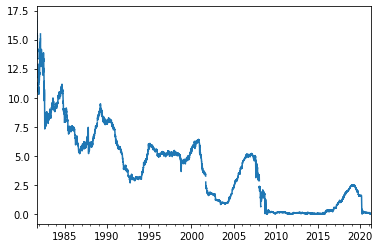

In [25]:
data.plot();

In [14]:
x = fred.get_series("UNEMPLOY").to_frame("UNEMPLOY")
y = fred.get_series("JTSJOL").to_frame("JTSJOL")
z = fred.get_series("CIVPART").to_frame("CIVPART")
data = x.join(y, how="inner")
data = data.join(z)
data["ratio"] = data["UNEMPLOY"] / data["JTSJOL"]
data["norm_ratio"] = data["ratio"] / data["CIVPART"] * 100
data.tail()

,UNEMPLOY,JTSJOL,CIVPART,ratio,norm_ratio
2020-10-01,11049.0,6873.0,61.6,1.607595,2.609732
2020-11-01,10728.0,6766.0,61.5,1.585575,2.578171
2020-12-01,10736.0,6752.0,61.5,1.590047,2.585443
2021-01-01,10130.0,7099.0,61.4,1.426962,2.324042
2021-02-01,9972.0,7367.0,61.4,1.353604,2.204567


In [21]:
aa = data[["ratio"]].reset_index()
aa.columns = ["timestamp", "value"]

cutoff = get_cutoff(recession, aa["timestamp"].min(), aa["timestamp"].max())
plot_linechart(aa, ytitle="UNEMPLOY/JTSJOL", cutoff=cutoff).interactive()

alt.LayerChart(...)

In [22]:
aa = data[["norm_ratio"]].reset_index()
aa.columns = ["timestamp", "value"]

cutoff = get_cutoff(recession, aa["timestamp"].min(), aa["timestamp"].max())
plot_linechart(aa, ytitle="norm", cutoff=cutoff).interactive()

alt.LayerChart(...)

In [ ]:
df = fred.get_series("STLFSI2").to_frame().reset_index()
df.columns = ["timestamp", "value"]
df.tail()

In [109]:
cutoff = get_cutoff(recession, df["timestamp"].min(), df["timestamp"].max())
plot_linechart(df, ytitle="Financial Stress Index", cutoff=cutoff).interactive()

alt.LayerChart(...)

In [108]:
# RECPROUSM156N, SAHMREALTIME
df = fred.get_series("SAHMREALTIME").to_frame().reset_index()
df.columns = ["timestamp", "value"]
df = df.query("timestamp >= '2000-01-01'")
df.tail()

,timestamp,value
731,2020-11-01,3.63
732,2020-12-01,3.23
733,2021-01-01,3.03
734,2021-02-01,2.87
735,2021-03-01,2.33


In [107]:
cutoff = get_cutoff(recession, df["timestamp"].min(), df["timestamp"].max())
plot_linechart(df, ytitle="recession", cutoff=cutoff).interactive()

alt.LayerChart(...)